In [226]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px




## Data Exploration

    Here, let,s work on get better our variables, which as int, float and object...datetime, etc.

In [227]:
startups = pd.read_csv('data/startup data.csv')
startups

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [228]:
# Here, we get all ids for original dataset 

x = startups['id'].str.split(':', expand=True)
x.rename(columns={0:'numero',1:'id'}, inplace=True)
ids = x['id'].astype(int)


In [229]:
startups['status'].value_counts()

acquired    597
closed      326
Name: status, dtype: int64

Upload a dataset, in whcih we are trying to get any important path that correlate with any            feature

In [230]:
# Upload the milestones dataset for get all milestone from differents companies with their ids
miles1 = pd.read_csv('data/milestones.csv')
miles1.drop(columns='id', inplace=True)
miles1.head()

,object_id,milestone_at,milestone_code,description,source_url,source_description,created_at,updated_at
0,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,http://www.techcrunch.com/2008/06/10/twitter-f...,"Twitter Fails To Fail, Community Rejoices",2008-06-18 08:14:06,2008-06-18 08:14:06
1,c:3138,2008-06-17,other,Twhirl announces support for Seesmic video pla...,http://www.inquisitr.com/1103/seesmic-now-avai...,Seesmic Now Available In Twhirl,2008-06-18 08:46:28,2008-06-18 08:46:28
2,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,http://www.comscore.com/press/release.asp?pres...,11 Billion Videos Viewed Online in the U.S. in...,2008-06-18 08:50:24,2008-06-18 08:50:24
3,c:314,2008-06-18,other,Reddit goes Open Source,http://blog.reddit.com/2008/06/reddit-goes-ope...,reddit goes open source,2008-06-19 04:14:00,2008-06-19 04:14:00
4,c:314,2008-01-22,other,Adds the ability to create your own Reddits,http://www.techcrunch.com/2008/01/22/reddit-ad...,Reddit Adds Ability to Create Your Own âRedd...,2008-06-19 04:15:53,2008-06-19 04:15:53


In [231]:
# Separate columns for getting split id
id = miles1['object_id'].str.split(':', expand=True)

miles = pd.concat([id,miles1], axis = 1)


In [232]:
miles.rename(columns= {1:'id'}, inplace=True)
miles['id'] = miles['id'].astype(int)

In [233]:
# Compare same id with original datasets and miles dataset
miles['in'] = np.where((miles['id'].isin(ids)),1,0)

miles = miles[miles['in'] == 1]

#x.reset_index().to_csv('miles_create.csv')

Let,s count how many times repeat the mode of this column.

In [234]:
# Groupby ids and descriptions

miles = miles.groupby('id').description.apply('AAAA '.join).reset_index()
miles['id'] = miles['id'].astype(str)
miles

,id,description
0,4,Accel Partners Raises 2 new fundsAAAA Another ...
1,9,Announced hire of new CEO
2,27,Long-Time Plaxo CEO Golub Leaves AAAA Plaxo li...
3,30,"KupiBonus.ru Receives Funding From ABRT, Mangr..."
4,40,Veoh declares bankruptcy
...,...,...
303,86120,Netgamix Inc added Patrick de Zeeuw to the adv...
304,102867,"WeHostels awarded ""Most Innovative Startup of ..."
305,144687,Mobile App for iPhone available on iTunesAAAA ...
306,149809,"Trendslide has joined Incutio, the latest 'Gro..."


In [235]:
# We can see the number of times each word has been repeated

from collections import Counter

world_count = list(miles['description'])
big_text = ''.join(world_count)
big_text
world_list = big_text.split()
world_counts = Counter(world_list)
world_counts
most_common_word = world_counts.most_common()
#most_common_word[30:]
most_common_word[20:21]

[('Launches', 30)]

In [236]:
#Here we make some binary columns to see how correlated is with rest of features
import re

miles['million'] = np.where(miles['description'].str.contains(r'[M-m]illion', case=False),1,0)
miles['invested'] = np.where(miles['description'].str.contains('invested'),1,0)
miles['Technology'] = np.where(miles['description'].str.contains('Technology'),1,0)
miles['Mobile'] = np.where(miles['description'].str.contains('Mobile'),1,0)
miles['Gold'] = np.where(miles['description'].str.contains('Gold'),1,0)
miles['Hootest'] = np.where(miles['description'].str.contains('Hootest'),1,0)
miles['Iphone'] = np.where(miles['description'].str.contains('Iphone'),1,0)
miles['object_id'] = 'c:'+ miles['id']

miles['million'].value_counts()

0    248
1     60
Name: million, dtype: int64

In [237]:
# Merge two dataframes with most important words about milestones dataset
startups = startups.merge(miles, on='object_id', how='left')
startups.loc[:, 'million':] = startups.loc[:, 'million':].fillna(0)

In [238]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 0 to 922
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id_x                      923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

We change some columns and values we don,t need, just for good looking and deleted remaining values

In [239]:
# Change name columns and drop some columns we don,t need
startups.rename(columns={'Unnamed: 0':'iD','is_top500':'Top500'}, inplace=True)
startups.drop(columns=['Unnamed: 6','id_x','id_y','labels','state_code.1'], inplace=True)

In [240]:
# Changing status to binary which are gonna be our variable

startups.loc[startups['status'] == 'closed', 'status'] = 0
startups.loc[startups['status'] == 'acquired', 'status'] = 1
startups['status'] = pd.to_numeric(startups['status'])


We are checking null values, which has milestone's columns and closet at.
Milestone columns means when they had importants milestones, and when the value is Nan means, thet did,t have yet nomilestone, so we decide to fill with '0'.
Closed at , we decide to fill with the last day of 2013, which is the current year there is closed bussines, which is 2013.


In [241]:
# change all NaN values, so we use the las day of 2013 for comparision since is the last day of dataset
startups['closed_at'] = startups['closed_at'].fillna('2013-12-31')

In [242]:
# Change to date time for using them in a futures predicts
startups['founded_at'] = pd.to_datetime(startups['founded_at'])
startups['first_funding_at'] = pd.to_datetime(startups['first_funding_at'])
startups['last_funding_at'] = pd.to_datetime(startups['last_funding_at'])
startups['closed_at'] = pd.to_datetime(startups['closed_at'])

In [243]:
# as we can see all values are current in 2013
x = startups['founded_at'].max()
y = startups['first_funding_at'].max()
z = startups['last_funding_at'].max()
j = startups['closed_at'].max() 

display(x, y, z, j)

Timestamp('2013-04-16 00:00:00')

Timestamp('2013-11-20 00:00:00')

Timestamp('2013-11-20 00:00:00')

Timestamp('2013-12-31 00:00:00')

In [244]:
# We create a new feature which show us how many year, they have been running since they ran the first time
startups['age'] = (startups['closed_at']- startups['founded_at'])
startups['age'] = round(startups.age/np.timedelta64(1,'Y'),2).astype(float)
startups.head()

,iD,state_code,latitude,longitude,zip_code,city,name,founded_at,closed_at,first_funding_at,...,status,description,million,invested,Technology,Mobile,Gold,Hootest,Iphone,age
0,1005,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,2007-01-01,2013-12-31,2009-04-01,...,1,Bandsintown hits 5 million registered usersAAA...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.00
1,204,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,2000-01-01,2013-12-31,2005-02-14,...,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.00
2,1001,CA,32.901049,-117.192656,92121,San Diego,Plixi,2009-03-18,2013-12-31,2010-03-30,...,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.79
3,738,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,2002-01-01,2013-12-31,2005-02-17,...,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.00
4,1002,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,...,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.17


In [245]:
# fill nan values and check how many values there are

print('NaN Values of closed at column has:',startups['closed_at'].isnull().sum())

NaN Values of closed at column has: 0


In [246]:
# as we see first milestone means diference of years between they founded and first milestone, last milestone mean diference year founded and last milestone, and milestones succeded.
startups[['age_first_milestone_year','age_last_milestone_year','milestones']].head(5)

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [247]:
startups['milestones'].isnull().sum()

0

In [248]:
startups[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [249]:
# Fill values Nan with 0, cause the startups which does't have any milestone is cause did,t get any milestone yet.
startups[['age_first_milestone_year','age_last_milestone_year','milestones']]=startups[['age_first_milestone_year','age_last_milestone_year','milestones']].fillna(0)

In [250]:
# check them out
startups[['age_first_milestone_year','age_last_milestone_year','milestones']].isnull().sum()

age_first_milestone_year    0
age_last_milestone_year     0
milestones                  0
dtype: int64

In [251]:
startups[[ 'age', 'age_first_funding_year','age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year']].sort_values('age_first_funding_year').head(20)

,age,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year
558,-3.95,-9.0466,-9.0466,-6.0466,-3.8822
584,3.33,-3.5068,0.3945,-0.9370,0.0849
263,5.55,-1.9863,-1.9863,0.0000,0.0000
431,2.83,-1.4712,-0.1370,0.0000,0.0000
489,5.35,-1.1836,-1.1836,0.8301,0.8301
240,2.50,-1.0521,0.6247,-1.3589,1.6630
127,4.41,-1.0110,1.4877,0.4055,1.3205
23,5.59,-1.0000,3.3151,3.6959,5.6630
847,2.03,-1.0000,2.2493,1.7479,1.7479
432,2.39,-1.0000,0.0000,-1.5863,0.8630


In [252]:
# As we see there are just 3 anomal valus, which the closed y older than opened, which is wierd.
startups['closed_at'][73] = pd.to_datetime('28/1/2012')
startups['founded_at'][558] = pd.to_datetime('4/1/2004')
	

/var/folders/fh/hxrrvrn15b5_v0bjv8nbpw2w0000gp/T/ipykernel_19846/1470209837.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

/var/folders/fh/hxrrvrn15b5_v0bjv8nbpw2w0000gp/T/ipykernel_19846/1470209837.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fh/hxrrvrn15b5_v0bjv8nbpw2w0000gp/T/ipykernel_19846/1470209837.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [253]:
# we remove rows which has values under 0 because, it might be an error
startups = startups.drop(startups[startups['age']<=0].index)
startups = startups.drop(startups[startups['age_first_funding_year']<0].index)
startups = startups.drop(startups[startups['age_last_funding_year']<0].index)
startups = startups.drop(startups[startups['age_first_milestone_year']<0].index)
startups = startups.drop(startups[startups['age_last_milestone_year']<0].index)

In [254]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 922
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   iD                        838 non-null    int64         
 1   state_code                838 non-null    object        
 2   latitude                  838 non-null    float64       
 3   longitude                 838 non-null    float64       
 4   zip_code                  838 non-null    object        
 5   city                      838 non-null    object        
 6   name                      838 non-null    object        
 7   founded_at                838 non-null    datetime64[ns]
 8   closed_at                 838 non-null    datetime64[ns]
 9   first_funding_at          838 non-null    datetime64[ns]
 10  last_funding_at           838 non-null    datetime64[ns]
 11  age_first_funding_year    838 non-null    float64       
 12  age_last_funding_year 

In [255]:
#startups = startups.to_csv('startupready2.csv')

# Data analaysis

In [256]:
# We can see correlation between all numeric values

#plt.figure(figsize=(30,22))
#sns.heatmap(startups[startups.columns].corr(), cmap= 'YlOrBr', annot=True);

/var/folders/fh/hxrrvrn15b5_v0bjv8nbpw2w0000gp/T/ipykernel_19846/1426121492.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



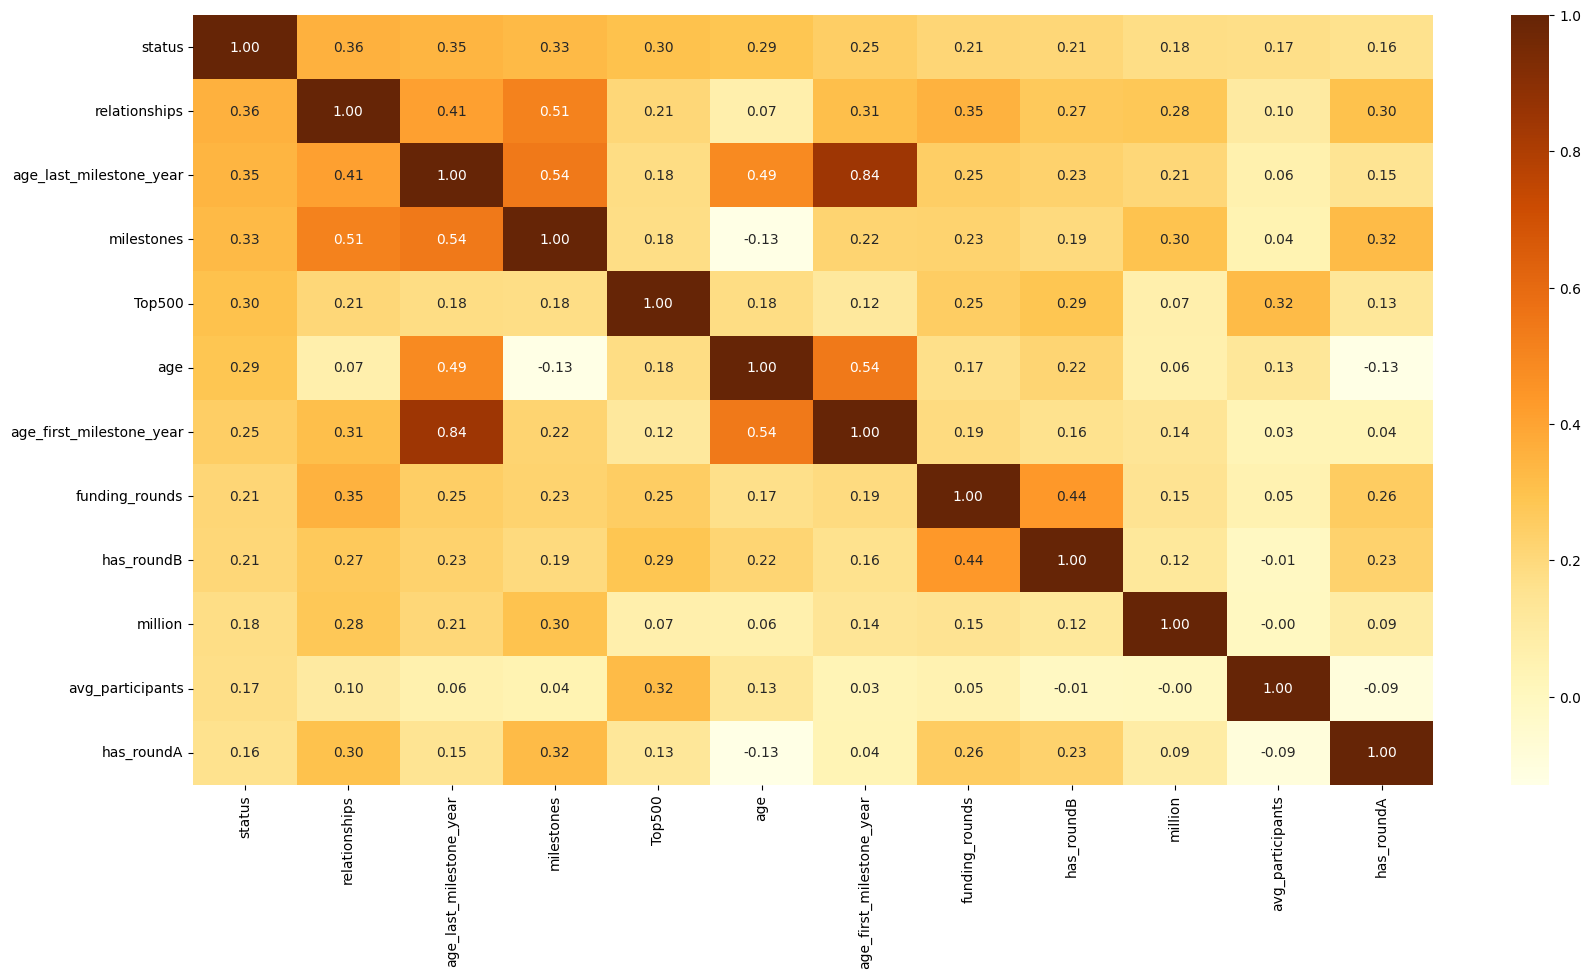

In [257]:
#Here we get the correlation between diferent variables, in this case we get the most 12 correlated
cols = startups[startups.columns].corr().nlargest(12,'status')['status'].index

cm = np.corrcoef(startups[cols].values.T) 

plt.figure(figsize=(20,10))
hm = sns.heatmap(cm, cbar=True, annot=True, cmap='YlOrBr', fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)

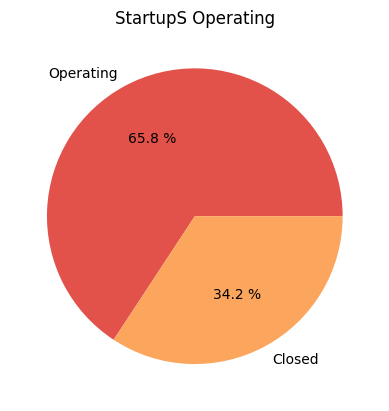

In [258]:
# How is the distribution about Operating and not?

status = startups['status'].value_counts()

sns.color_palette("Spectral", as_cmap=True)

fig, ax = plt.subplots()

ax.pie(status, labels = ['Operating','Closed'], autopct="%0.1f %%")
ax.set_title('StartupS Operating');

In [259]:
startups['status'].value_counts()

1    551
0    287
Name: status, dtype: int64

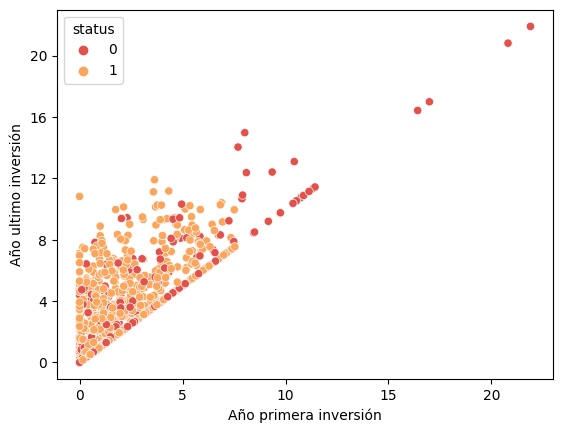

In [260]:
# Here we can check if two features correlated with eachother

sns.color_palette("Spectral", as_cmap=True)

sns.scatterplot(data = startups, x=startups['age_first_funding_year'], y=startups['age_last_funding_year'], hue='status' ,edgecolors='K' ,linewidths=0.5)
plt.yticks((0,4,8,12,16,20))
plt.xlabel('Año primera inversión' )
plt.ylabel('Año ultimo inversión');

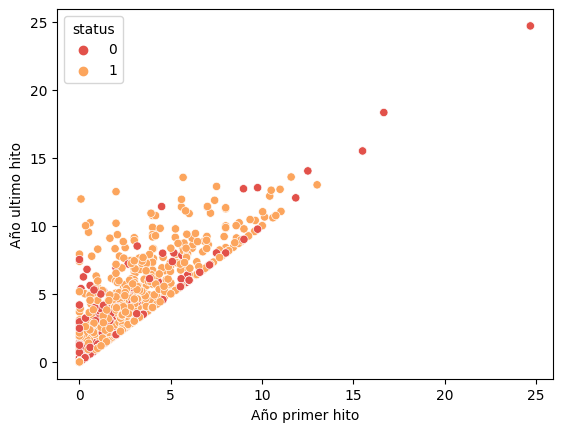

In [261]:
import seaborn as sns

sns.set_palette("Spectral")

sns.scatterplot(data=startups, x='age_first_milestone_year', y='age_last_milestone_year', hue='status', edgecolors='k', linewidths=0.5)
plt.xlabel('Año primer hito' )
plt.ylabel('Año ultimo hito');


In [262]:
# We see how are the companies related how many years they are running their companies
startups['age']=startups['age'].astype(int)
age = startups.groupby(['age','status']).agg({'iD':'count'}).reset_index()

age = pd.pivot_table(age, values = 'iD', columns=['status'], index=['age']).reset_index()
age.columns=['age','Closed','Acquired']
age.head()

,age,Closed,Acquired
0,0,4.0,NaN
1,1,23.0,2.0
2,2,32.0,11.0
3,3,34.0,22.0
4,4,33.0,42.0


In [263]:
fig = go.Figure()

x_values = list(range(1, max(age['age'])+1))

fig.add_trace(go.Bar(
    x=age['age'].values,
    y=age['Closed'].values,
    name='Closed',
    marker_color='indianred'))
fig.add_trace(go.Bar(
    x=age['age'].values,
    y=age['Acquired'].values,
    name='Operating',
    marker_color='lightsalmon'
))

adquired_trace = fig.data[0]
adquired_trace.update(text=age['Closed'], texttemplate='%{text:.0f}', textposition='outside')

adquired_trace = fig.data[1]
adquired_trace.update(text=age['Acquired'], texttemplate='%{text:.0f}', textposition='outside')

fig.update_layout(title_text='Years of operation',barmode='group',xaxis=dict(tickmode='array', tickvals=x_values))
fig.update_xaxes(title = 'Años')
fig.update_yaxes(title = 'Nº Empresas')
#fig.update_traces(text=age['iD'], texttemplate='%{text:.0f}', textposition='outside')

fig.show()

#fig.write_html("Graficos/Yearsofoperations.html")


In [264]:
# Here we create a table, where we can see the percentage of success companies
startups['range_relation'] = startups['relationships'].apply(lambda x: 'relationships 0' if x == 0 else 'relationships > 10' if x > 10 else 'relationships 1-10' )


rate_success = startups.groupby(['range_relation','status']).agg({'iD':'count'}).reset_index()
rate_success = pd.pivot_table(rate_success, values = 'iD',columns= ['status'], index= ['range_relation']).reset_index()
rate_success.columns = ['relationships','Closed','Acquired']
rate_success['Total'] = rate_success['Closed'] + rate_success['Acquired'].astype(int)
rate_success['Success Rate'] = round((rate_success['Acquired'] / rate_success['Total'])*100,2).astype(float)
rate_success = rate_success.sort_values(by= 'Success Rate')
#rate_success.to_csv('ratesuccess.csv')
rate_success

,relationships,Closed,Acquired,Total,Success Rate
0,relationships 0,33,3,36,8.33
1,relationships 1-10,233,371,604,61.42
2,relationships > 10,21,177,198,89.39


In [265]:
# We can check how the distribution goes along the relationships features

fig = px.bar(rate_success, x='relationships', y=['Closed','Acquired'])
color = sns.set_palette("Spectral")
fig.update_layout(barmode='group',bargroupgap=0.1)
fig.update_layout(title_text='Distribution Success')
fig.update_traces(marker=dict(color='lightsalmon'), selector=dict(name='Operating'))
fig.update_traces(marker=dict(color='indianred'), selector=dict(name='Closed'))

adquired_trace = fig.data[1]
adquired_trace.update(text=rate_success['Success Rate'], texttemplate='%{text:.0f}%', textposition='outside')
fig.show()

#fig.write_html("Graficos/Distribution success.html")

In [266]:
founds = startups.groupby(['state_code','city'])[['funding_total_usd']].sum().sort_values('funding_total_usd',ascending=False).reset_index()

# We can see percentage of found quantity along States and cities
import plotly.graph_objs as go

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]])

fig.add_trace(go.Pie(labels = founds.state_code.values, values=founds.funding_total_usd.values, ),1,1)

fig.add_trace(go.Pie(labels = founds.city.values, values=founds.funding_total_usd.values, ),1,2)
fig.update_traces(textposition='inside', textinfo='percent+label',insidetextorientation='radial')

fig.update_layout(title_text='Total funds ', width=1300,height=500, template = 'plotly_dark')



In [267]:
funding = startups.groupby(['funding_rounds','status'])[['status']].count().rename(columns={'status':'count'}).reset_index()
funding = pd.pivot_table(funding, values = 'count',columns= ['status'], index= ['funding_rounds']).reset_index()
funding.columns = ['funding_rounds','Closed','Acquired']

In [268]:
# We see the distribution of status related how many relathionships they have
fig = go.Figure()

x_values = list(range(1, len(funding)+12))

fig.add_trace(go.Bar(
    x=funding['funding_rounds'].values,
    y=funding['Closed'].values,
    name='Closed',
    marker_color='indianred'))
fig.add_trace(go.Bar(
    x=funding['funding_rounds'].values,
    y=funding['Acquired'].values,
    name='Operating',
    marker_color='lightsalmon'
))

adquired_trace = fig.data[0]
adquired_trace.update(text=funding['Closed'], texttemplate='%{text:.0f}', textposition='outside')

adquired_trace = fig.data[1]
adquired_trace.update(text=funding['Acquired'], texttemplate='%{text:.0f}', textposition='outside')

fig.update_layout(title_text='Funding Rounds',xaxis=dict(tickmode='array', tickvals=x_values),barmode='group')
#fig.update_traces(text=status['count'], texttemplate='%{text:.0f}', textposition='outside')





# Feature Engineering

In [269]:
# Min max Scaller cause the values are too big
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

startups['funding_total_usd'] = scaler.fit_transform(startups['funding_total_usd'].values.reshape(-1, 1))

In [270]:
from sklearn.preprocessing import LabelEncoder

# Related with more relationships
startups['relation10'] = np.where(startups['relationships'].isin(range(11,64)),1,0)

# Has round A, B, C and D

startups['Has_roundABCD'] = np.where((startups['has_roundA'] ==1) & (startups['has_roundB'] == 1) & (startups['has_roundA'] == 1) & (startups['has_roundA'] == 1), 1,0)

# Has seed ?

startups['VCAN'] = np.where ((startups['has_VC'] == 1) & (startups['has_angel']),1,0)

# state

le= LabelEncoder()

le.fit(startups['state_code'])
startups['state_code'] = le.transform(startups['state_code'])  # xgboost acepta strings ?

# Nº Milestones per company
startups['milesto_4'] = np.where(startups['milestones'].isin(range(1,4)),1,0)


# How the seasons are correlated 

startups['month'] = startups['last_funding_at'].dt.month

startups['autumn'] = np.where(startups['month'].isin([10,11,12]), 1, 0)
startups['winter'] = np.where(startups['month'].isin([1,2,3]), 1, 0)
startups['spring'] = np.where(startups['month'].isin([4,5,6]), 1, 0)
startups['summer'] = np.where(startups['month'].isin([7,8,9]), 1, 0)

# age of running

startups['age-5'] = np.where(startups['age'].isin(np.arange(0,5,0.06)),1,0)
startups['age+10'] = np.where(startups['age'].isin(np.arange(12,15,0.01)),1,0)

# $ of funds 

startups['-5M'] = np.where(startups['funding_total_usd'].isin(np.arange(0,5*10**6)),1,0)
startups['+5/10M'] = np.where(startups['funding_total_usd'].isin(np.arange(11*10**6)),1,0)
#startups['>10/15M'] = np.where(startups['funding_total_usd'].isin(np.arange(100*10**6,200*10**6)),1,0)




In [271]:
#plt.figure(figsize=(12,10))
#sns.heatmap(startups[['status', 'relationships', 'age_last_milestone_year', 'milestones',
#       'Top500', 'age', '>10relation', 'age_first_milestone_year',
#       'Has_roundABCD', 'funding_rounds', 'has_roundB', 'milesto<4','>5-10M','+5M','funding_total_usd']].corr(), annot = True)

In [272]:
startups['status'].value_counts(normalize=True)

1    0.657518
0    0.342482
Name: status, dtype: float64

/var/folders/fh/hxrrvrn15b5_v0bjv8nbpw2w0000gp/T/ipykernel_19846/1819770709.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



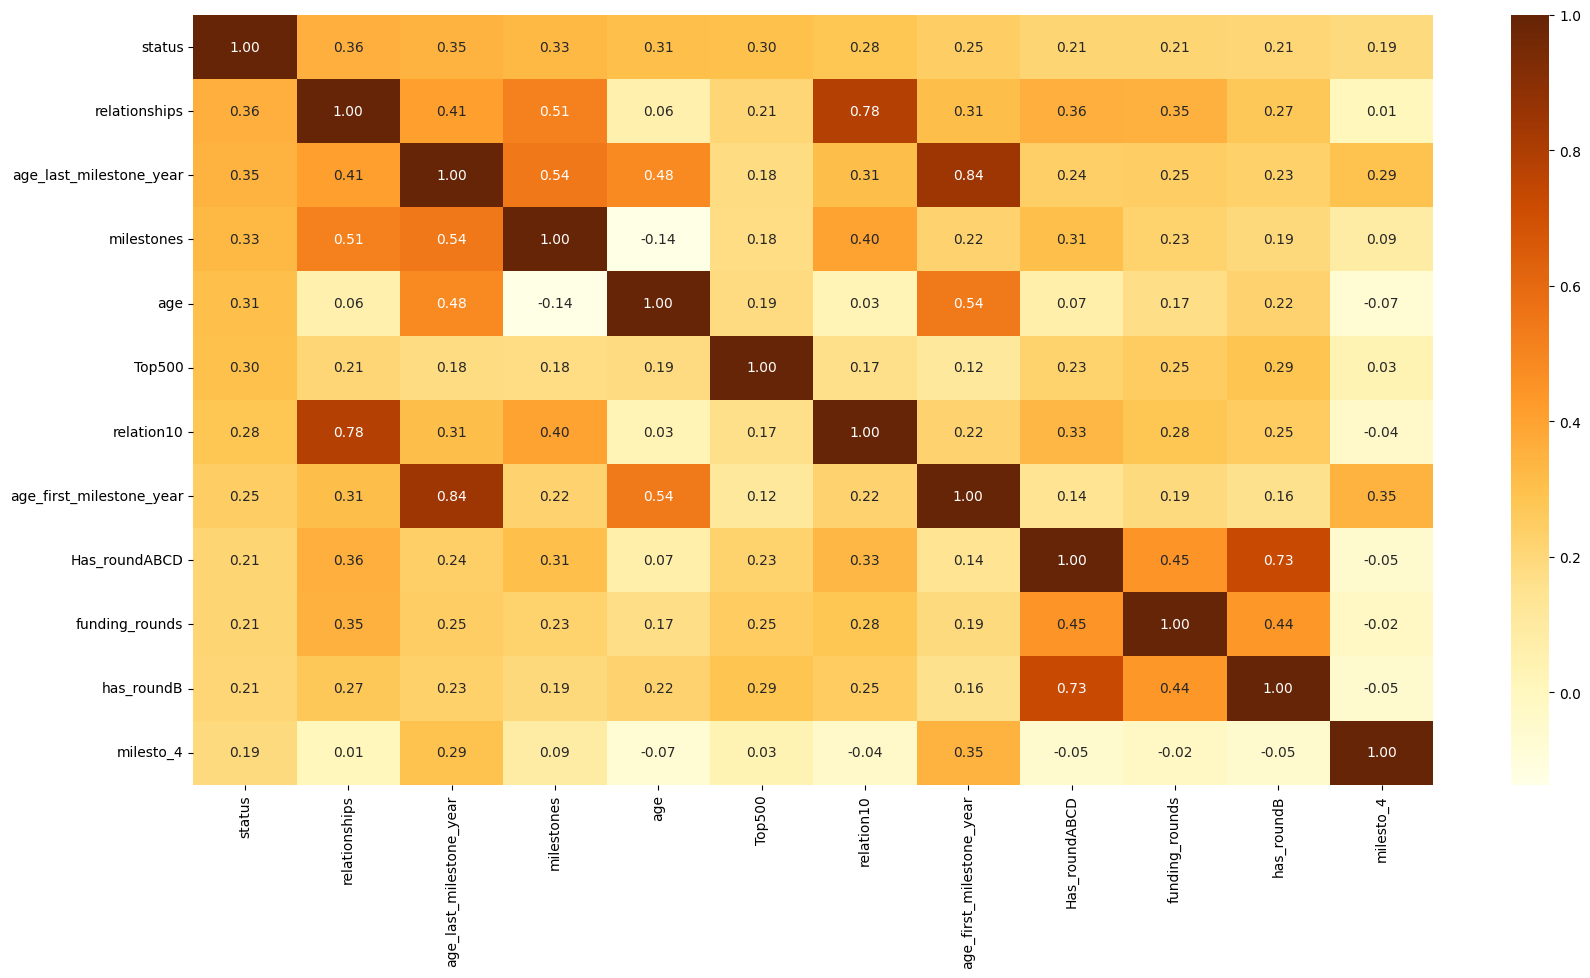

In [273]:
cols = startups[startups.columns].corr().nlargest(12,'status')['status'].index

cm = np.corrcoef(startups[cols].values.T) 

plt.figure(figsize=(20,10))
hm = sns.heatmap(cm, cbar=True, annot=True, cmap='YlOrBr', fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)

    # we create a Undersample dataset, just in case we need it

In [274]:

closed = startups[startups['status']==0]
acquired = startups[startups['status']==1]

from sklearn.utils import resample

no_credit_under = resample(acquired, replace=False, n_samples=287, random_state=25)
#startups = pd.concat([no_credit_under, closed])

Split a dataset between Train and Test, after try so many different features and mixes

In [275]:
X = startups[['relationships', 'age_last_milestone_year', 'milestones',
       'Top500', 'age', 'relation10', 'age_first_milestone_year',
       'Has_roundABCD', 'funding_rounds', 'has_roundB', 'milesto_4', 'million']]

y = startups['status']

In [276]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score,roc_auc_score, precision_score,precision_recall_curve, auc
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

seed = 5

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)




print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(670, 12)
(168, 12)
(670,)
(168,)


    # we create a oversample just in case we need it   

In [277]:
sm = SMOTE(random_state=2)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # We create a dataset with scaler number to get that smaller and manageable for analysis

In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

# MODELING SCORING

Let,s see which is the best one for different needs

## RANDOM FOREST (SCORING = PRECISION)

In [279]:
model = RandomForestClassifier()

parameters = {"n_estimators":[160,170,180,190],
              "max_depth": [5,6,7,8],
              "min_samples_split": [10,11,12,13],
              'max_features' :[1,2,3,4]
              }

#rf_gs = GridSearchCV(model, parameters, cv=5, scoring="precision")
#
#rf_gs.fit(X_train, y_train)
#rf_gs.best_params_

In [280]:

model_ran = RandomForestClassifier(max_depth=8, min_samples_split=13, n_estimators=160, max_features=5, random_state=23)

model_ran.fit(X_train, y_train)

y_pred_ran = model_ran.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_ran))
print("Recall", recall_score(y_test, y_pred_ran))
print("Precision", precision_score(y_test, y_pred_ran))


accuracy_ran_pre = accuracy_score(y_test, y_pred_ran)

recall_ran_pre = recall_score(y_test, y_pred_ran)

precision_ran_pre = precision_score(y_test, y_pred_ran)

Accuracy 0.8035714285714286
Recall 0.91
Precision 0.7913043478260869


In [281]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_ran)

precision_recall_ran = auc(precision, recall)

print(precision_recall_ran)

0.28219979296066255


In [282]:
y_pred_ran

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

Text(0, 0.5, 'True positive rate')

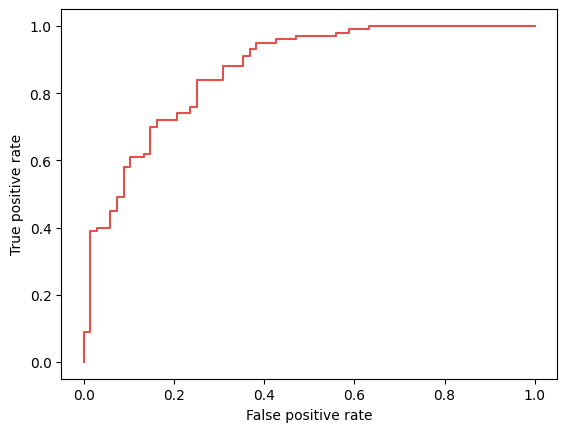

In [283]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_ran)

y_pred_proba = model_ran.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [284]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test, y_pred_ran)

array([[44, 24],
       [ 9, 91]])

<Axes: >

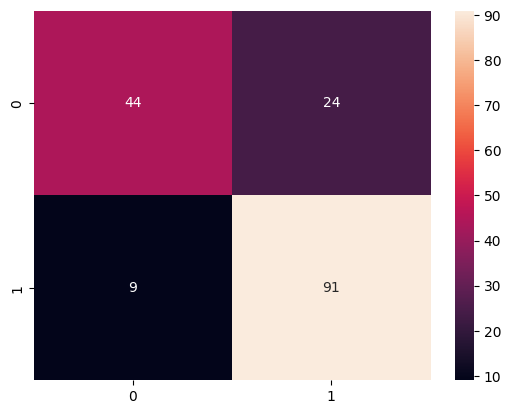

In [130]:
sns.heatmap(confusion_matrix(y_test, y_pred_ran), annot=True)

In [131]:
X.columns.values

array(['relationships', 'age_last_milestone_year', 'milestones', 'Top500',
       'age', 'relation10', 'age_first_milestone_year', 'Has_roundABCD',
       'funding_rounds', 'has_roundB', 'milesto_4', 'million'],
      dtype=object)

In [132]:
model_ran.feature_importances_

array([0.26403567, 0.18675461, 0.03689555, 0.02494274, 0.23806918,
       0.0175144 , 0.15349124, 0.01149323, 0.03900389, 0.01625424,
       0.00506825, 0.00647699])

In [133]:
model_ran.predict_proba(X_test)

array([[0.11180645, 0.88819355],
       [0.36600598, 0.63399402],
       [0.4155845 , 0.5844155 ],
       [0.03211892, 0.96788108],
       [0.05501254, 0.94498746],
       [0.24947355, 0.75052645],
       [0.15275208, 0.84724792],
       [0.18953653, 0.81046347],
       [0.69199212, 0.30800788],
       [0.07164326, 0.92835674],
       [0.01899097, 0.98100903],
       [0.19145329, 0.80854671],
       [0.16239207, 0.83760793],
       [0.31366416, 0.68633584],
       [0.36701784, 0.63298216],
       [0.2630053 , 0.7369947 ],
       [0.06021814, 0.93978186],
       [0.05951532, 0.94048468],
       [0.08581994, 0.91418006],
       [0.65286657, 0.34713343],
       [0.87992824, 0.12007176],
       [0.06287104, 0.93712896],
       [0.02502389, 0.97497611],
       [0.08499932, 0.91500068],
       [0.30478046, 0.69521954],
       [0.96313867, 0.03686133],
       [0.0561702 , 0.9438298 ],
       [0.20928718, 0.79071282],
       [0.04113849, 0.95886151],
       [0.0957129 , 0.9042871 ],
       [0.

## GRADIENT BOOSTING (SCORING = PRECISION)

In [285]:
model = GradientBoostingClassifier()

parameters = {"n_estimators":[70,80,90],
              "max_depth": [3,4,5],
              "learning_rate": [0.1,0.2],
              "min_samples_split": [6,7,8,9]
              }

gb_gs = GridSearchCV(model, parameters, cv=5, scoring="precision")

gb_gs.fit(X_train, y_train)
gb_gs.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_samples_split': 9,
 'n_estimators': 70}

In [294]:
model_gra = GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_split= 9, n_estimators= 70, random_state=1)

model_gra.fit(X_train, y_train)

y_pred_gra = model_gra.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_gra))
print("Recall", recall_score(y_test, y_pred_gra))
print("Precision", precision_score(y_test, y_pred_gra))

accuracy_gra_pre = accuracy_score(y_test, y_pred_gra)

recall_gra_pre = recall_score(y_test, y_pred_gra)

precision_gra_pre = precision_score(y_test, y_pred_gra)

Accuracy 0.8392857142857143
Recall 0.91
Precision 0.8348623853211009


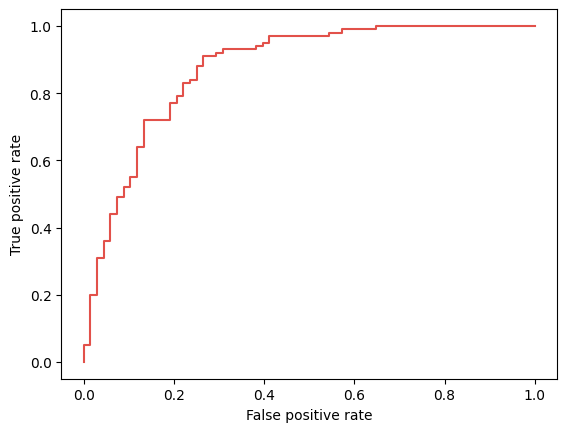

In [295]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_gra)

y_pred_proba = model_gra.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate");

In [296]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_gra)

precision_recall_ran = auc(precision, recall)

print(precision_recall_ran)

0.30397881170816954


In [297]:
from sklearn.metrics import confusion_matrix ,classification_report

confusion_matrix(y_test, y_pred_gra)

array([[50, 18],
       [ 9, 91]])

<Axes: >

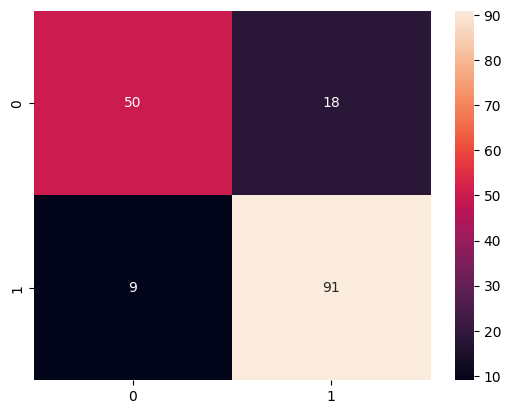

In [298]:
sns.heatmap(confusion_matrix(y_test, y_pred_gra), annot=True)

In [140]:
model_gra.predict_proba(X_test)

array([[2.72267453e-03, 9.97277325e-01],
       [5.42199832e-01, 4.57800168e-01],
       [7.09149932e-01, 2.90850068e-01],
       [1.70544422e-02, 9.82945558e-01],
       [6.41568257e-03, 9.93584317e-01],
       [9.62632876e-02, 9.03736712e-01],
       [5.19142244e-03, 9.94808578e-01],
       [7.25687008e-02, 9.27431299e-01],
       [8.92209528e-01, 1.07790472e-01],
       [3.92901735e-03, 9.96070983e-01],
       [3.58855421e-04, 9.99641145e-01],
       [2.02297632e-01, 7.97702368e-01],
       [5.58294384e-02, 9.44170562e-01],
       [5.82326785e-01, 4.17673215e-01],
       [9.07438408e-01, 9.25615919e-02],
       [6.10857486e-02, 9.38914251e-01],
       [5.99595586e-03, 9.94004044e-01],
       [2.27287951e-02, 9.77271205e-01],
       [1.32161081e-02, 9.86783892e-01],
       [6.62254584e-01, 3.37745416e-01],
       [9.67801174e-01, 3.21988264e-02],
       [5.49053650e-02, 9.45094635e-01],
       [2.41740425e-03, 9.97582596e-01],
       [8.42063384e-03, 9.91579366e-01],
       [4.394569

In [141]:
print(classification_report(y_test, y_pred_gra))

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        68
           1       0.83      0.90      0.86       100

    accuracy                           0.83       168
   macro avg       0.83      0.81      0.82       168
weighted avg       0.83      0.83      0.82       168



## ADA BOOST (SCORING = PRECISION)

In [142]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

parameters = {"n_estimators":[23,30,40,50,60,70,80,90],
              "learning_rate": [0.1,0.2],
              "random_state": [10,20,23]
              }

#ada_cl = GridSearchCV(model, parameters, cv=5, scoring="precision")
#
#ada_cl.fit(X_train, y_train)
#ada_cl.best_params_

In [143]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=0.2, n_estimators=280, random_state=11)

model.fit(X_train, y_train)

y_pred_ada = model.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_ada))
print("Recall", recall_score(y_test, y_pred_ada))
print("Precision", precision_score(y_test, y_pred_ada))


accuracy_ada_pre = accuracy_score(y_test, y_pred_ada)

recall_ada_pre = recall_score(y_test, y_pred_ada)

precision_ada_pre = precision_score(y_test, y_pred_ada)


Accuracy 0.7976190476190477
Recall 0.91
Precision 0.7844827586206896


In [144]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_ada)

array([[43, 25],
       [ 9, 91]])

## XGB CLASS (SCORING = PRECISION)

In [145]:
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier

model = XGBClassifier()

parameters = {"n_estimators":[23,30,40,50],
              "max_depth": [1,2,3]
              }

#xgb_cl = GridSearchCV(model, parameters, cv=5, scoring="precision",error_score='raise')
#
#xgb_cl.fit(X_train, y_train)
#xgb_cl.best_params_

In [146]:

from xgboost import XGBRFClassifier

xgb_cl = XGBRFClassifier(n_estimators=40,max_depth=3, random_state=seed, booster='gbtree', class_weight = 'balanced')
xgb_cl.fit(X_train, y_train)

y_pred_xgb = xgb_cl.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_xgb))
print("Recall", recall_score(y_test, y_pred_xgb))
print("Precision", precision_score(y_test, y_pred_xgb))


accuracy_xgb_pre = accuracy_score(y_test, y_pred_xgb)

recall_xgb_pre = recall_score(y_test, y_pred_xgb)

precision_xgb_pre = precision_score(y_test, y_pred_xgb)


[18:03:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Accuracy 0.7202380952380952
Recall 0.86
Precision 0.7226890756302521


Text(0, 0.5, 'True positive rate')

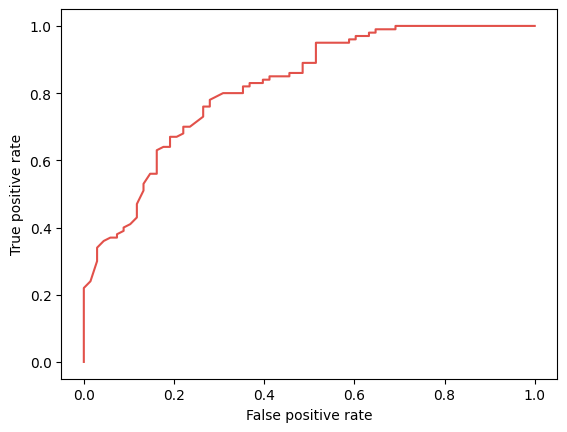

In [147]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_xgb)

y_pred_proba = xgb_cl.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [148]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_xgb)

array([[35, 33],
       [14, 86]])

## KNN (SCORING = PRECISION)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

parameters = {"n_neighbors":range(1,10),
              "weights": ["uniform", "distance"],
              "p": [1, 2],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
              "leaf_size": [10, 20, 30],
              "metric": ["euclidean", "manhattan", "chebyshev"]
              }

#model= GridSearchCV(model, parameters, cv=5, scoring="precision",error_score='raise')
#
#model.fit(X_train, y_train)
#model.best_params_

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
 leaf_size= 20,
 metric= 'chebyshev',
 n_neighbors=4,
 p= 1,
 weights= 'uniform')

knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.76


In [151]:
from sklearn.metrics import confusion_matrix, classification_report

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

print(precision_score(y_test, pred))

print(recall_score(y_test, pred))

recall_knn_pre = recall_score(y_test, pred)
accuracy_knn_pre = accuracy_score(y_test, y_pred_xgb)
precision_knn_pre = precision_score(y_test, pred)


[[44 24]
 [16 84]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        68
           1       0.78      0.84      0.81       100

    accuracy                           0.76       168
   macro avg       0.76      0.74      0.75       168
weighted avg       0.76      0.76      0.76       168

0.7777777777777778
0.84


In [152]:
Results = pd.DataFrame({'Precision':[ precision_ran_pre,precision_gra_pre,precision_ada_pre,precision_xgb_pre,precision_knn_pre], 
                        'Recall': [recall_ran_pre, recall_gra_pre, recall_ada_pre,recall_xgb_pre,recall_knn_pre],
                            'Accuracy': [accuracy_ran_pre,accuracy_gra_pre, accuracy_ada_pre,accuracy_xgb_pre,accuracy_knn_pre]
                            }, 
                            index = ['RANDOM','GRADIENT','ADABOOST','XGBRFBOOST','KNN'])

Results



,Precision,Recall,Accuracy
RANDOM,0.791304,0.91,0.803571
GRADIENT,0.825688,0.90,0.827381
ADABOOST,0.784483,0.91,0.797619
XGBRFBOOST,0.722689,0.86,0.720238
KNN,0.777778,0.84,0.720238


<Axes: >

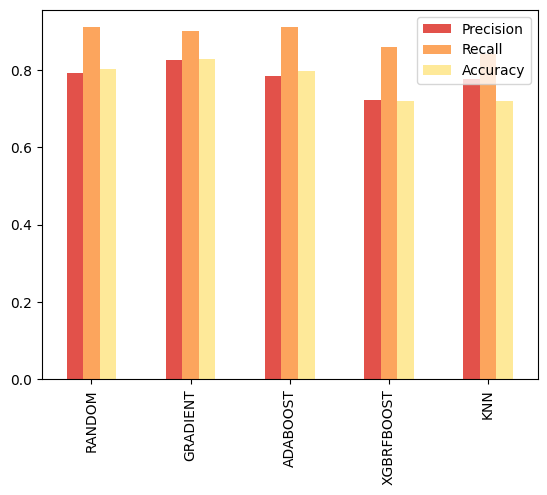

In [153]:
Results.plot(kind= 'bar')

## Features importances

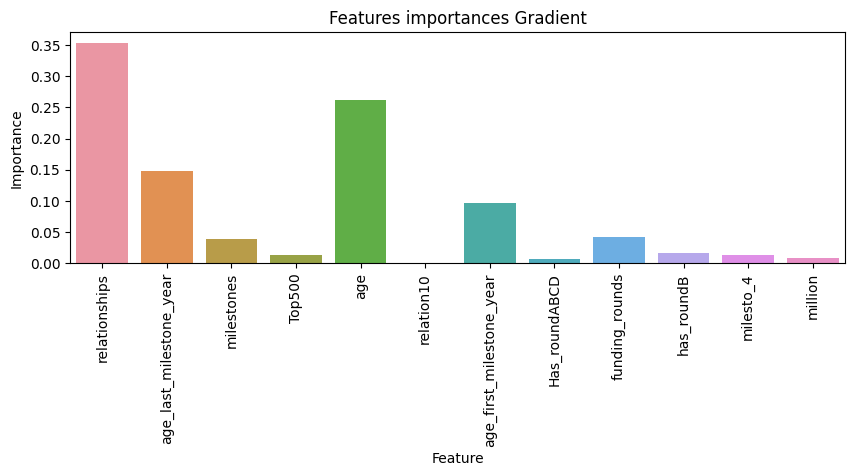

In [300]:
plt.figure(figsize=(10,3))

importances = pd.DataFrame({'Importance':model_gra.feature_importances_,'Feature':X.columns })
sns.barplot(x = 'Feature', y = 'Importance', data= importances)
sns.color_palette("Spectral",as_cmap=True)
plt.xticks(rotation=90)
plt.title('Features importances Gradient');

## PICKLE PRECISION

In [155]:
from sklearn.pipeline import Pipeline

pipe_final = Pipeline(steps=[
                    ('classifier', GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_split= 7, n_estimators= 90, random_state=60))
])
print("Accuracy", accuracy_score(y_test, y_pred_gra))
print("Recall", recall_score(y_test, y_pred_gra))
print("Precision", precision_score(y_test, y_pred_gra))

pipe_final.fit(X_train,y_train)
pipe_final

Accuracy 0.8273809523809523
Recall 0.9
Precision 0.8256880733944955


Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=4,
                                            min_samples_split=7,
                                            n_estimators=90,
                                            random_state=60))])

In [156]:
import pickle

with open('streamlit/model_miguel_precision.pkl', 'wb') as archivo_salida:
    pickle.dump(pipe_final, archivo_salida)

In [157]:
with open('streamlit/model_miguel_precision.pkl', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [158]:
#X_test.to_csv('X_test_precision.csv', index=False)

In [159]:
X_test = pd.read_csv('X_test_precision.csv')

In [160]:
predictions = loaded_model.predict(X_test)


In [161]:
prediction_proba = loaded_model.predict_proba(X_test) 
prediction_proba

array([[2.72267453e-03, 9.97277325e-01],
       [5.42199832e-01, 4.57800168e-01],
       [7.09149932e-01, 2.90850068e-01],
       [1.70544422e-02, 9.82945558e-01],
       [6.41568257e-03, 9.93584317e-01],
       [9.62632876e-02, 9.03736712e-01],
       [5.19142244e-03, 9.94808578e-01],
       [7.25687008e-02, 9.27431299e-01],
       [8.92209528e-01, 1.07790472e-01],
       [3.92901735e-03, 9.96070983e-01],
       [3.58855421e-04, 9.99641145e-01],
       [2.02297632e-01, 7.97702368e-01],
       [5.58294384e-02, 9.44170562e-01],
       [5.82326785e-01, 4.17673215e-01],
       [9.07438408e-01, 9.25615919e-02],
       [6.10857486e-02, 9.38914251e-01],
       [5.99595586e-03, 9.94004044e-01],
       [2.27287951e-02, 9.77271205e-01],
       [1.32161081e-02, 9.86783892e-01],
       [6.62254584e-01, 3.37745416e-01],
       [9.67801174e-01, 3.21988264e-02],
       [5.49053650e-02, 9.45094635e-01],
       [2.41740425e-03, 9.97582596e-01],
       [8.42063384e-03, 9.91579366e-01],
       [4.394569

In [162]:
predictions = pd.DataFrame(predictions,columns=['Predicciones'])
prediction_proba = pd.DataFrame(prediction_proba.round(3),columns=['Fatal','Exitoso'])


In [163]:
results = pd.concat([X_test,predictions,prediction_proba], axis = 1)
results

,relationships,age_last_milestone_year,milestones,Top500,age,relation10,age_first_milestone_year,Has_roundABCD,funding_rounds,has_roundB,milesto_4,million,Predicciones,Fatal,Exitoso
0,12,2.0575,2,1,6,1,0.2521,0,2,0,1,0.0,1,0.003,0.997
1,4,5.3151,1,0,6,0,5.3151,0,1,0,1,0.0,0,0.542,0.458
2,5,4.6164,3,1,4,0,2.0301,1,2,1,1,0.0,0,0.709,0.291
3,13,4.6247,2,1,6,1,3.1699,0,1,0,1,0.0,1,0.017,0.983
4,25,8.3534,2,1,8,1,6.1699,1,6,1,1,0.0,1,0.006,0.994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,9,8.7589,2,1,14,0,8.5041,0,5,0,1,1.0,1,0.001,0.999
164,3,7.1233,1,0,4,0,7.1233,0,1,0,1,0.0,0,0.999,0.001
165,4,2.1096,2,0,3,0,1.0000,0,1,0,1,0.0,1,0.335,0.665
166,0,0.0000,0,1,8,0,0.0000,0,3,1,0,0.0,0,0.988,0.012


# MODELING RECALL

## RANDOM FOREST (SCORING = RECALL)

In [164]:
model = RandomForestClassifier()

parameters = {"n_estimators":[90,100,110,120,130],
              "max_depth": [1,2],
              "min_samples_split": [2,3,4,8]
              }

#rf_gs = GridSearchCV(model, parameters, cv=5, scoring="recall")

#rf_gs.fit(X_train, y_train)
#rf_gs.best_params_

In [201]:
model_ran = RandomForestClassifier(max_depth=1, min_samples_split=2, n_estimators=120, random_state=2)

model_ran.fit(X_train_scal, y_train)

y_pred_ran = model_ran.predict(X_test_scal)

print("Accuracy", accuracy_score(y_test, y_pred_ran))
print("Recall", recall_score(y_test, y_pred_ran))
print("Precision", precision_score(y_test, y_pred_ran))


accuracy_ran_re = accuracy_score(y_test, y_pred_ran)

recall_ran_re = recall_score(y_test, y_pred_ran)

precision_ran_re = precision_score(y_test, y_pred_ran)

Accuracy 0.75
Recall 0.99
Precision 0.7071428571428572


In [166]:
y_pred_ran

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

Text(0, 0.5, 'True positive rate')

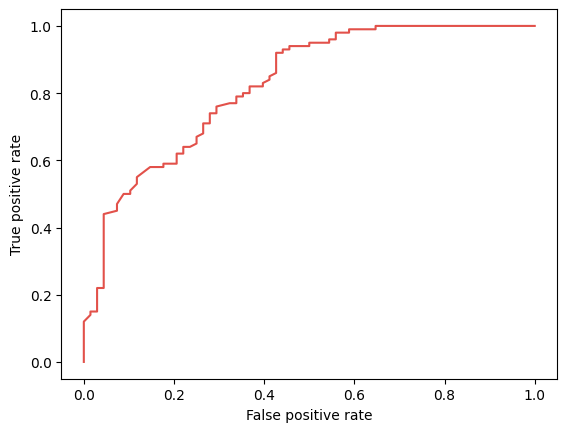

In [205]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_ran)

y_pred_proba = model_ran.predict_proba(X_test_scal)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [207]:
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_test, y_pred_ran)

array([[27, 41],
       [ 1, 99]])

<Axes: >

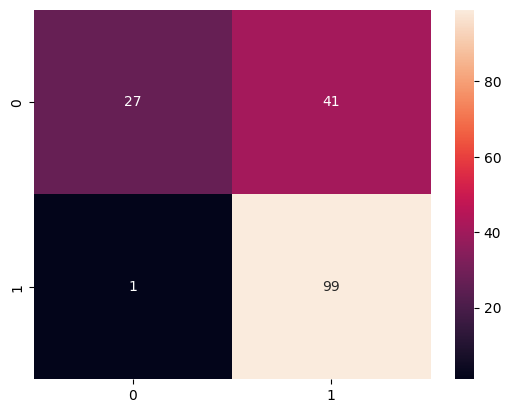

In [208]:
sns.heatmap(confusion_matrix(y_test, y_pred_ran), annot=True)

In [170]:
model_ran.feature_importances_

array([0.21666667, 0.225     , 0.075     , 0.025     , 0.21666667,
       0.05833333, 0.15833333, 0.        , 0.01666667, 0.        ,
       0.        , 0.00833333])

In [171]:
model_ran.predict_proba(X_test_scal)

array([[0.26817977, 0.73182023],
       [0.24400434, 0.75599566],
       [0.2538829 , 0.7461171 ],
       [0.21000439, 0.78999561],
       [0.20318324, 0.79681676],
       [0.30766263, 0.69233737],
       [0.22201188, 0.77798812],
       [0.26604782, 0.73395218],
       [0.4966583 , 0.5033417 ],
       [0.2323587 , 0.7676413 ],
       [0.20078339, 0.79921661],
       [0.42486135, 0.57513865],
       [0.32593964, 0.67406036],
       [0.26244048, 0.73755952],
       [0.2571169 , 0.7428831 ],
       [0.35355089, 0.64644911],
       [0.2283544 , 0.7716456 ],
       [0.23056063, 0.76943937],
       [0.22559918, 0.77440082],
       [0.45494313, 0.54505687],
       [0.49389978, 0.50610022],
       [0.20600009, 0.79399991],
       [0.20318324, 0.79681676],
       [0.21214898, 0.78785102],
       [0.34143834, 0.65856166],
       [0.54857216, 0.45142784],
       [0.20318324, 0.79681676],
       [0.20078339, 0.79921661],
       [0.20600009, 0.79399991],
       [0.2283544 , 0.7716456 ],
       [0.

In [172]:
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        68
           1       0.70      1.00      0.83       100

    accuracy                           0.75       168
   macro avg       0.85      0.69      0.69       168
weighted avg       0.82      0.75      0.72       168



## GRADIENT BOOSTING (SCORING = RECALL)

In [173]:
model = GradientBoostingClassifier()

parameters = {"n_estimators":[30,20,50,10],
              "max_depth": [1,2,3],
              "learning_rate": [0.1,0.2],
              "min_samples_split": [2,3,4]
              }

#gb_gs = GridSearchCV(model, parameters, cv=5, scoring="recall")
#
#gb_gs.fit(X_train_scal, y_train)
#gb_gs.best_params_

model_gra = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, min_samples_split= 2, n_estimators= 10, random_state=1)

model_gra.fit(X_train_scal, y_train)

y_pred_gra = model_gra.predict(X_test_scal)

print("Accuracy", accuracy_score(y_test, y_pred_gra))
print("Recall", recall_score(y_test, y_pred_gra))
print("Precision", precision_score(y_test, y_pred_gra))

accuracy_gra_re = accuracy_score(y_test, y_pred_gra)

recall_gra_re = recall_score(y_test, y_pred_gra)

gradient_gra_re = precision_score(y_test, y_pred_gra)

Accuracy 0.7440476190476191
Recall 0.99
Precision 0.7021276595744681


Text(0, 0.5, 'True positive rate')

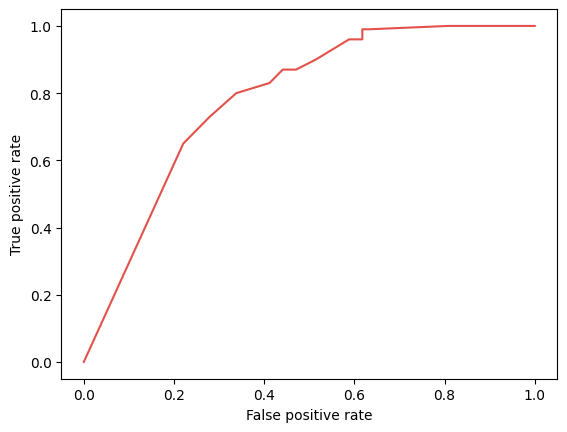

In [174]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_gra)

y_pred_proba = model_gra.predict_proba(X_test_scal)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [175]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_gra)

precision_recall_ran = auc(precision, recall)

print(precision_recall_ran)

0.2538019250253293


In [176]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_gra)

array([[26, 42],
       [ 1, 99]])

<Axes: >

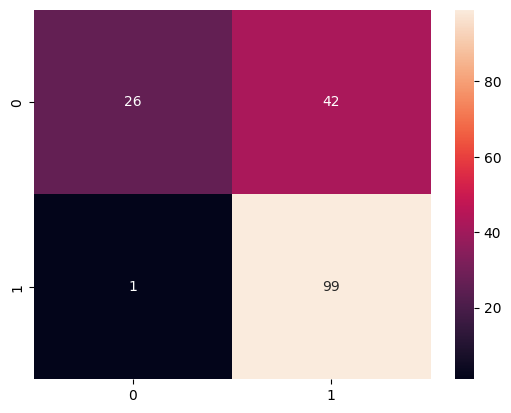

In [177]:
sns.heatmap(confusion_matrix(y_test, y_pred_gra), annot=True)


In [178]:
print(classification_report(y_test, y_pred_gra))

              precision    recall  f1-score   support

           0       0.96      0.38      0.55        68
           1       0.70      0.99      0.82       100

    accuracy                           0.74       168
   macro avg       0.83      0.69      0.68       168
weighted avg       0.81      0.74      0.71       168



## ADA BOOST (SCORING = RECALL)

In [179]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()

parameters = {"n_estimators":[23,30,40,50,60,70,80,90],
              "learning_rate": [0.1,0.2],
              "random_state": [10,20,23]
              }

#ada_cl = GridSearchCV(model, parameters, cv=5, scoring="recall")
#
#ada_cl.fit(X_train, y_train)
#ada_cl.best_params_

In [180]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=0.2, n_estimators=70, random_state=10)

model.fit(X_train_scal, y_train)

y_pred_ada = model.predict(X_test_scal)

print("Accuracy", accuracy_score(y_test, y_pred_ada))
print("Recall", recall_score(y_test, y_pred_ada))
print("Precision", precision_score(y_test, y_pred_ada))


accuracy_ada_re = accuracy_score(y_test, y_pred_ada)

recall_ada_re = recall_score(y_test, y_pred_ada)

precision_ada_re = precision_score(y_test, y_pred_ada)


Accuracy 0.7916666666666666
Recall 0.93
Precision 0.768595041322314


In [181]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_ada)

array([[40, 28],
       [ 7, 93]])

## XGB CLASS (SCORING = RECALL)

In [182]:
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier

model = XGBClassifier()

parameters = {"n_estimators":[23,30,40,50],
              "max_depth": [1,2,3]
              }

#xgb_cl = GridSearchCV(model, parameters, cv=5, scoring="recall",error_score='raise')
#
#xgb_cl.fit(X_train_scal, y_train)
#xgb_cl.best_params_

In [183]:

from xgboost import XGBRFClassifier

xgb_cl = XGBRFClassifier(n_estimators=40,max_depth=2, random_state=1, booster='gbtree', class_weight = 'balanced')
xgb_cl.fit(X_train_scal, y_train)

y_pred_xgb = xgb_cl.predict(X_test_scal)

print("Accuracy", accuracy_score(y_test, y_pred_xgb))
print("Recall", recall_score(y_test, y_pred_xgb))
print("Precision", precision_score(y_test, y_pred_xgb))


accuracy_xgb_re = accuracy_score(y_test, y_pred_xgb)

recall_xgb_re = recall_score(y_test, y_pred_xgb)

precision_xgb_re = precision_score(y_test, y_pred_xgb)


[18:03:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

Accuracy 0.7738095238095238
Recall 0.93
Precision 0.75


Text(0, 0.5, 'True positive rate')

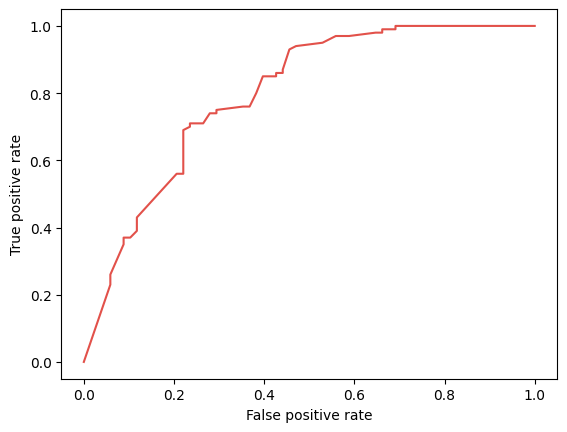

In [184]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_xgb)

y_pred_proba = xgb_cl.predict_proba(X_test_scal)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

Text(0, 0.5, 'True positive rate')

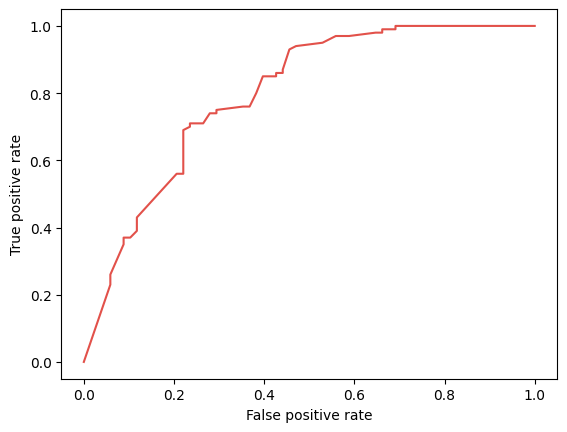

In [185]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test, y_pred_xgb)

y_pred_proba = xgb_cl.predict_proba(X_test_scal)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [186]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_xgb)

array([[37, 31],
       [ 7, 93]])

In [187]:
from sklearn.neighbors import KNeighborsClassifier


n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_scal, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scal, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scal, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.73


In [188]:
from sklearn.metrics import confusion_matrix, classification_report

pred = knn.predict(X_test_scal)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

precision_score(y_test, pred)

recall_score(y_test, pred)

recall_knn_re = recall_score(y_test, pred)
accuracy_knn_pre = accuracy_score(y_test, y_pred_xgb)
precision_knn_re = precision_score(y_test, pred)


[[33 35]
 [11 89]]
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        68
           1       0.72      0.89      0.79       100

    accuracy                           0.73       168
   macro avg       0.73      0.69      0.69       168
weighted avg       0.73      0.73      0.71       168



In [189]:
Results = pd.DataFrame({'Recall': [recall_ran_re, recall_gra_re, recall_ada_re,recall_xgb_re,recall_knn_re],
                            'Accuracy': [accuracy_ran_re,accuracy_gra_re, accuracy_ada_re,accuracy_xgb_re,accuracy_knn_pre],
                            'Precision':[ precision_ran_re,gradient_gra_re,precision_ada_re,precision_xgb_re,precision_knn_re]}, 
                            index = ['RANDOM','GRADIENT','ADABOOST','XGBRFBOOST','KNN'])
Results



,Recall,Accuracy,Precision
RANDOM,1.00,0.750000,0.704225
GRADIENT,0.99,0.744048,0.702128
ADABOOST,0.93,0.791667,0.768595
XGBRFBOOST,0.93,0.773810,0.750000
KNN,0.89,0.773810,0.717742


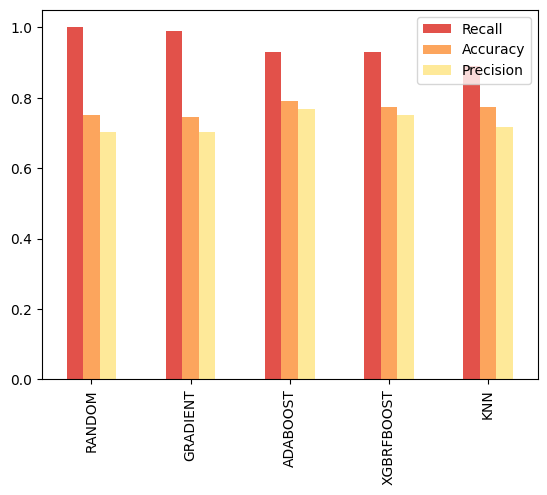

In [190]:
Results.plot(kind= 'bar');

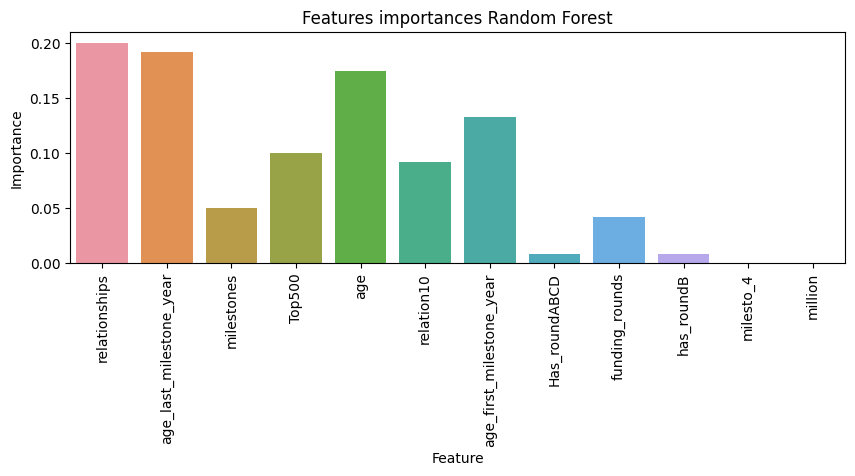

In [216]:
plt.figure(figsize=(10,3))
importances = pd.DataFrame({'Importance':model_ran.feature_importances_,'Feature':X.columns })
sns.barplot(x = 'Feature', y = 'Importance', data= importances)
sns.color_palette("Spectral",as_cmap=True)
plt.xticks(rotation=90)
plt.title('Features importances Random Forest');

## PICKLE RECALL

In [192]:
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn.preprocessing import FunctionTransformer

pipe_final = Pipeline(steps=[
                ('classifier',
                RandomForestClassifier(max_depth=1, n_estimators=120,
                                        random_state=1))])

print("Accuracy", accuracy_score(y_test, y_pred_ran))
print("Recall", recall_score(y_test, y_pred_ran))
pipe_final.fit(X_train,y_train)
pipe_final

Accuracy 0.75
Recall 1.0


Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=1, n_estimators=120,
                                        random_state=1))])

In [193]:
import pickle

with open('streamlit/model_miguel_recall.pkl', 'wb') as archivo_salida:
    pickle.dump(pipe_final, archivo_salida)

In [194]:
with open('streamlit/model_miguel_recall.pkl', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [195]:
#X_test.reset_index(drop=True, inplace=True)
#X_train.reset_index(drop=True, inplace=True)

#X_test.to_csv('X_test.csv', index= False)
#X_train.to_csv('X_train.csv',index= False)

In [196]:
X_test = pd.read_csv('data/X_test.csv')

In [197]:
loaded_model.predict(X_test)
loaded_model.predict_proba(X_test) 


array([[0.26817977, 0.73182023],
       [0.24400434, 0.75599566],
       [0.2538829 , 0.7461171 ],
       [0.21000439, 0.78999561],
       [0.20318324, 0.79681676],
       [0.30766263, 0.69233737],
       [0.22201188, 0.77798812],
       [0.25119084, 0.74880916],
       [0.4966583 , 0.5033417 ],
       [0.2323587 , 0.7676413 ],
       [0.20078339, 0.79921661],
       [0.42486135, 0.57513865],
       [0.32593964, 0.67406036],
       [0.26244048, 0.73755952],
       [0.24225992, 0.75774008],
       [0.35355089, 0.64644911],
       [0.2283544 , 0.7716456 ],
       [0.23056063, 0.76943937],
       [0.22559918, 0.77440082],
       [0.44008616, 0.55991384],
       [0.49389978, 0.50610022],
       [0.20600009, 0.79399991],
       [0.20318324, 0.79681676],
       [0.21214898, 0.78785102],
       [0.34143834, 0.65856166],
       [0.54857216, 0.45142784],
       [0.20318324, 0.79681676],
       [0.20078339, 0.79921661],
       [0.20600009, 0.79399991],
       [0.2283544 , 0.7716456 ],
       [0.

In [198]:
print(classification_report(y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55        68
           1       0.70      1.00      0.83       100

    accuracy                           0.75       168
   macro avg       0.85      0.69      0.69       168
weighted avg       0.82      0.75      0.72       168



# CONCLUSIONES

There are two different clients, or vision for deliver this proyect, one is depending on recall scoring and the other precision.

As we know, recall means everything that is TRUE in this case (1), has to predict good or at least the majority of them has to be controlled, for example this is perfect for people who want to invest in many companies that they could be successful, such ETF or any active that does't have risk at all.

In the other hand, precision means that everything that it predict, for example a people with a lot of money that just need the right company to invest; in this case we wouldn't allow any FALSE prediction in the wonderland, but day by day we can improve our model. As we know, as much great data as we have, the better is for us.

Overall, I got a good score for recall, which is 99%, in view of this, this model is great, but i will improve with more data and better feature with more information, perharps I would need upgrade dataset, that would be aweesome for the future. Precision is 84% which is not bad, is way improvable but with time and good data will be better. The ROC curve shows the precision and recall, is going to have a good score but is a bit move to the right, that means TRUE positive is going to 100%.

